In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
os.getcwd()

'C:\\Users\\sherw\\AAA_Term3_CV_HWs\\HW1'

In [3]:
os.chdir(r'C:\Users\sherw\OneDrive\Desktop\HW1_Vision\New folder')

In [4]:
img = cv2.imread('Objects1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.imread('Objects1.jpg',0)

# Objects1:

In [46]:
blurred = cv2.GaussianBlur(img_gray,(19,19),0)

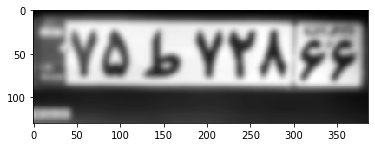

In [47]:
plt.imshow(blurred,'gray')

In [48]:
edges = cv2.Canny(blurred,100,200)

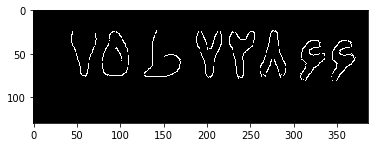

In [49]:
plt.imshow(edges,'gray')

In [50]:
ver_projection = np.sum(edges,axis = 0)
hor_projection = np.sum(edges,axis = 1)

In [52]:
ratio = edges.shape
plt.rcParams['figure.figsize'] = (ratio[1]/10,ratio[0]/10)

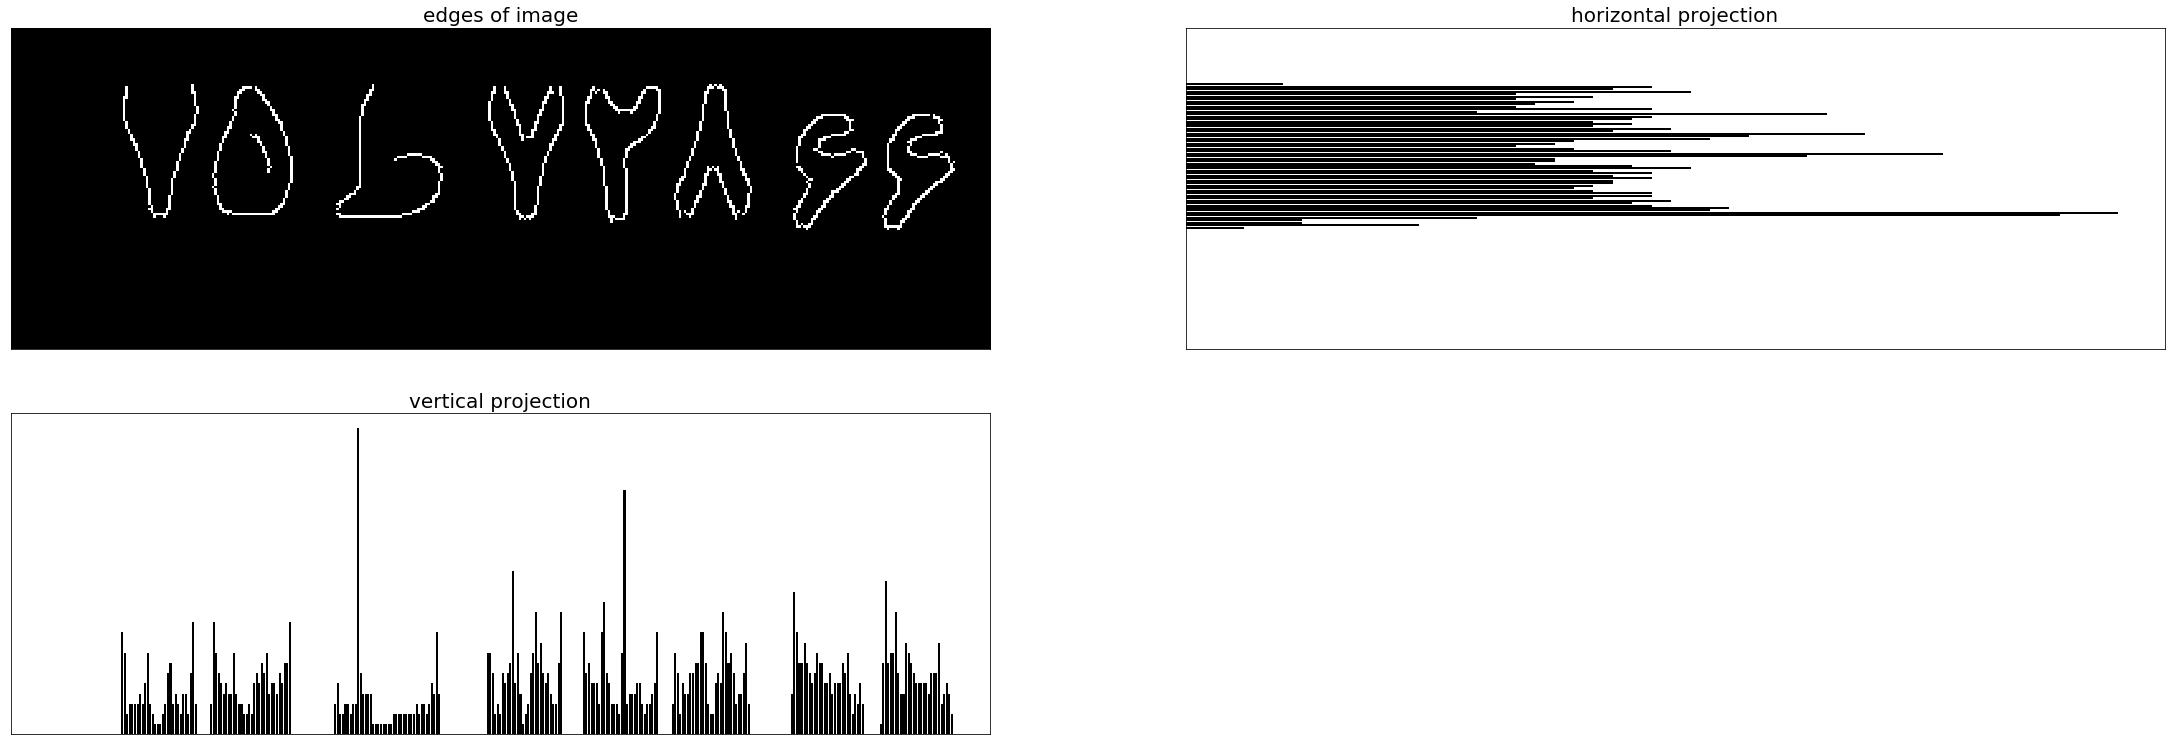

In [54]:
ratio = edges.shape

plt.subplot(2,2,1)
plt.imshow(edges,'gray',aspect="auto")
plt.title('edges of image',size =20)
# plt.axis('off')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.barh(np.arange(len(hor_projection)),hor_projection,color = 'black')
plt.title('horizontal projection',size =20)
plt.ylim(130,0)
# plt.gca().invert_yaxis()
# plt.axis('off')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.bar(np.arange(len(ver_projection)),ver_projection,color = 'black')
plt.title('vertical projection',size =20)
plt.xlim(0,ratio[1])
# plt.axis('off')
plt.xticks([])
plt.yticks([])

plt.savefig('object1_projection.jpg')
plt.show()


In [55]:
len_hor = len(hor_projection)
prev_val = 0
hor_index = []
for i in range(len_hor):
    if hor_projection[i] > 0 and prev_val == 0:
        hor_index.append(i-1)
    elif hor_projection[i] == 0 and prev_val > 0:
        hor_index.append(i+1)
    prev_val = hor_projection[i]


In [56]:
len_ver = len(ver_projection)
prev_val = 0
ver_index = []
for i in range(len_ver):
    if ver_projection[i] > 0 and prev_val == 0:
        ver_index.append(i-1)
    elif ver_projection[i] == 0 and prev_val > 0:
        ver_index.append(i+1)
    prev_val = ver_projection[i]


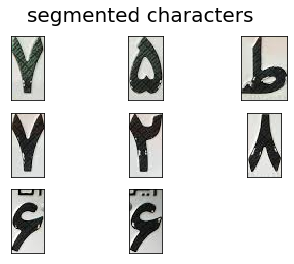

In [101]:
segments1 = []

for i in range(len(ver_index)//2):
    segments1.append(img[hor_index[0]:hor_index[1], ver_index[i*2]:ver_index[i*2+1]])

for j in range(len(segments1)):
    plt.subplot(3,3,j+1)
    plt.imshow(segments1[j])
    plt.xticks([])
    plt.yticks([])

plt.suptitle('segmented characters',size = 20)
plt.savefig('object1_characters.jpg')
plt.show()

# Objects2:

In [82]:
plt.rcParams['figure.figsize'] = (8,8)

In [83]:
img2 = cv2.imread('Objects2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_gray2 = cv2.imread('Objects2.jpg',0)

In [84]:
blurred2 = cv2.GaussianBlur(img_gray2,(3,3),0)

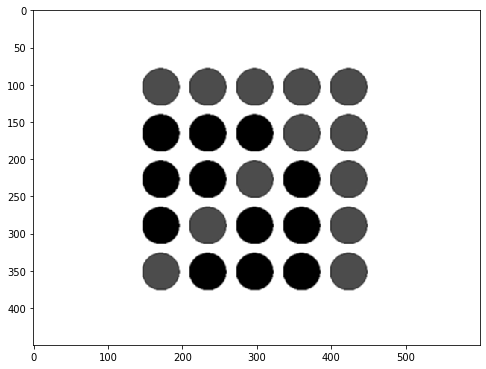

In [85]:
plt.imshow(blurred2,'gray')

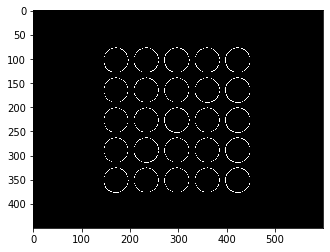

In [108]:
edges2 = cv2.Canny(blurred2,100,200)
plt.imshow(edges2,'gray')

In [109]:
ver_projection2 = np.sum(edges2,axis = 0)
hor_projection2 = np.sum(edges2,axis = 1)

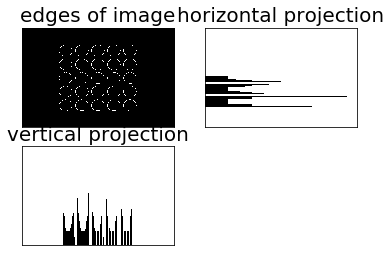

In [110]:
ratio = edges.shape

plt.subplot(2,2,1)
plt.imshow(edges2,'gray',aspect="auto")
plt.title('edges of image',size =20)
# plt.axis('off')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.barh(np.arange(len(hor_projection2)),hor_projection2,color = 'black')
plt.title('horizontal projection',size =20)
# plt.ylim(130,0)
# plt.gca().invert_yaxis()
# plt.axis('off')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.bar(np.arange(len(ver_projection2)),ver_projection2,color = 'black')
plt.title('vertical projection',size =20)
# plt.xlim(0,ratio[1])
# plt.axis('off')
plt.xticks([])
plt.yticks([])

plt.savefig('object2_projection.jpg')
plt.show()


In [111]:
len_hor2 = len(hor_projection2)
prev_val = 0
hor_index2 = []
for i in range(len_hor2):
    if hor_projection2[i] > 0 and prev_val == 0:
        hor_index2.append(i-1)
    elif hor_projection2[i] == 0 and prev_val > 0:
        hor_index2.append(i+1)
    prev_val = hor_projection2[i]


In [112]:
len_ver2 = len(ver_projection2)
prev_val = 0
ver_index2 = []
for i in range(len_ver2):
    if ver_projection2[i] > 0 and prev_val == 0:
        ver_index2.append(i-1)
    elif ver_projection2[i] == 0 and prev_val > 0:
        ver_index2.append(i+1)
    prev_val = ver_projection2[i]


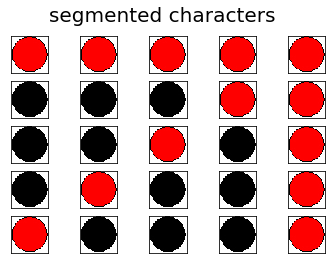

In [113]:
segments2 = []

for i in range(len(hor_index2)//2):
    for j in range(len(ver_index2)//2):
        segments2.append(img2[hor_index2[i*2]:hor_index2[i*2+1], ver_index2[j*2]:ver_index2[j*2+1]])

for j in range(len(segments2)):
    plt.subplot(5,5,j+1)
    plt.imshow(segments2[j])
    plt.xticks([])
    plt.yticks([])

plt.suptitle('segmented characters',size = 20)
plt.savefig('object2_characters.jpg')
plt.show()